<a href="https://colab.research.google.com/github/azierahmed/Constructors-and-Method-Overloading/blob/master/gradient_descent_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [ ]:
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    ax = plt.axes(projection='3d')
    ax.view_init(35, 300)
    ax.scatter3D(X[0, :], X[1, :], y, c=y);

## Reading and plotting the data

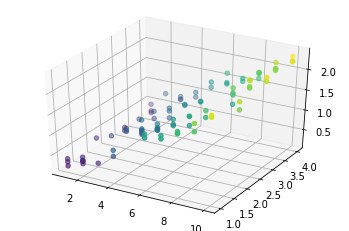

In [ ]:
n_rooms = np.random.randint(1, 11, size=100)
n_bathrooms = np.random.randint(1, 5, size=100)
X = np.asarray([n_rooms, n_bathrooms])

real_w1, real_w2 = 0.2, 0.05
y = real_w1 * X[0, :] + real_w2*X[1, :] + np.random.normal(0, 0.1, size=100)

plot_points(X, y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.

- Output (prediction) formula

$$\hat{y} = w_1 r + w_2 b$$

- Error function

$$MSE(y, \hat{y}) = (y - \hat{y})^2$$

- The function that updates the weights

$$ w_1 \longrightarrow w_1 + 2\alpha r(y - \hat{y})$$

$$ w_2 \longrightarrow w_2 + 2\alpha b(y - \hat{y})$$



In [ ]:
# Implement the following functions

# Output (prediction) formula
def output_formula(features, weights):
    return features[0] * weights[0] + features[1] * weights[1]

# Error (MSE) formula
def error_formula(y, output):
    return (y-output)**2

# Gradient descent step
def update_weights(x, y, weights, learn_rate):
    pred = output_formula(x, weights)
    loss_grad = pred - y
    weights[0] -= 2*learn_rate*x[0]*loss_grad
    weights[1] -= 2*learn_rate*x[1]*loss_grad

    return weights



## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [ ]:
np.random.seed(44)

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    for e in range(epochs):
        for x, y in zip(features, targets):
            weights = update_weights(x, y, weights, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

    return errors
            

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

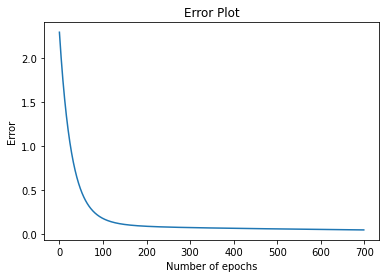

In [ ]:
epochs = 700
learnrate = 0.0001

errors = train(X, y, epochs, learnrate, True)

# Plotting the error
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()